In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
!pip install klib

In [3]:
df = pd.read_csv('/workspaces/codespaces-jupyter/data/train.csv')
df.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [5]:
import klib

In [6]:
# Clean the column names, drop missing values, and convert data types
df = klib.clean_column_names(df)
df = klib.drop_missing(df)
df = klib.convert_datatypes(df)

# Check for duplicates and remove them
df = df.drop_duplicates()

# calculate the lower and upper bounds based on the IQR
Q1 = np.percentile(df['product_length'], 25)
Q3 = np.percentile(df['product_length'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# identify the outliers
outliers = df[(df['product_length'] < lower_bound) | (df['product_length'] > upper_bound)]

# remove the outliers
df = df[(df['product_length'] >= lower_bound) & (df['product_length'] <= upper_bound)]

# print the number of removed outliers
print(f"Removed {len(outliers)} outliers.")



Removed 208533 outliers.


In [7]:
df.isnull().sum()

product_id               0
title                   12
bullet_points       819296
description        1080845
product_type_id          0
product_length           0
dtype: int64

In [8]:
# Count the number of rows before dropping NaN values
print("Number of rows before dropping NaN values:", len(df))

# Drop the rows that contain null and NaN values
df = df.dropna()

# Count the number of rows after dropping NaN values
print("Number of rows after dropping NaN values:", len(df))


Number of rows before dropping NaN values: 2041165
Number of rows after dropping NaN values: 910389


In [9]:
df.isnull().sum()

product_id         0
title              0
bullet_points      0
description        0
product_type_id    0
product_length     0
dtype: int64

In [10]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load the stopwords and the Lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a function to preprocess the text
def process_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Return the list of tokens
    return tokens

# Load the data frame with 10,000 rows
df = df.head(10000)

# Concatenate the 'TITLE', 'BULLET_POINTS', and 'DESCRIPTION' columns into a new 'text' column
df['text'] = df[['title', 'bullet_points', 'description']].apply(lambda x: ' '.join(x), axis=1)

# Apply the preprocess_text function to the 'text' column and replace the original text with the list of tokens
df['text'] = df['text'].apply(process_text)





In [13]:
df

,product_id,title,bullet_points,description,product_type_id,product_length,text
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495,"[priknik, horn, red, electric, air, horn, comp..."
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574,"[alishah, woman, cotton, ankle, length, leggin..."
5,2152929,HINS Metal Bucket Shape Plant Pot for Indoor &...,"[Simple and elegant, great for displaying indo...",HINS Brings you the most Elegant Looking Pot w...,5725,950.000000,"[hin, metal, bucket, shape, plant, pot, indoor..."
7,2026580,Delavala Self Adhesive Kitchen Backsplash Wall...,[HIGH QUALITY PVC MATERIAL: The kitchen alumin...,<p><strong>Aluminum Foil Stickers-good kitchen...,6030,984.251967,"[delavala, self, adhesive, kitchen, backsplash..."
9,2998633,Hexwell Essential oil for Home Fragrance Oil A...,[100% Pure And Natural Essential Oil Or Fragra...,"Transform your home, workplace or hotel room i...",8201,393.700787,"[hexwell, essential, oil, home, fragrance, oil..."
...,...,...,...,...,...,...,...
24828,1939004,KESYOO Unicorn Mini Backpack Clear Holographic...,"[Roomy space for carrying snacks or clothes, b...",<b>Description</b><br/><br/>If you have any is...,3413,984.251967,"[kesyoo, unicorn, mini, backpack, clear, holog..."
24830,1657108,andy & natalie Women's Shiny Tops Holographic ...,"[Material:Polyester and spandex,lightweight an...",<b>Andy & Natalie Women Sparkle Metallic Tee T...,2985,70.866142,"[andy, natalie, woman, shiny, top, holographic..."
24833,2765469,Casefisher Magnetic Leather Flip Wallet Case B...,[This premium vegan leather flip back case cov...,Casefisher flip cover has soft TPU material in...,12058,551.181102,"[casefisher, magnetic, leather, flip, wallet, ..."
24834,2754193,LaidBack Vivo V7 / Vivo 1718 Back Case Cover |...,[Protection: Vivo V7 / Vivo 1718 Cover and Cas...,Unique product by LaidBack Made with cutting e...,12064,472.440944,"[laidback, vivo, v7, vivo, 1718, back, case, c..."


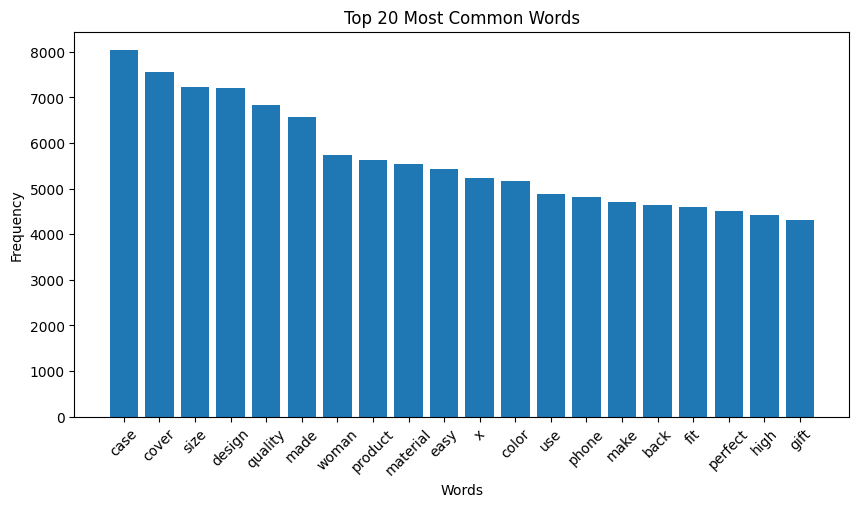

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

# Combine all the lists of tokens in the 'text' column
tokens = [token for row in df['text'] for token in row]

# Get the frequency count of each token
word_count = Counter(tokens)

# Get the top 20 most common tokens and their frequencies
top_words = word_count.most_common(20)

# Separate the top words and their frequencies into two lists
words = [word[0] for word in top_words]
freqs = [word[1] for word in top_words]

# Plot the top words and their frequencies in a bar chart
plt.figure(figsize=(10, 5))
plt.bar(words, freqs)
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


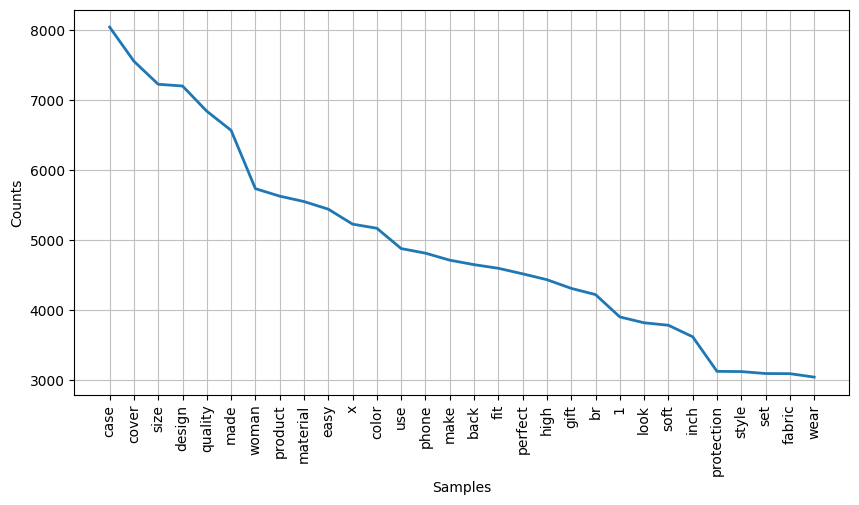

In [15]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Create a list of all the tokens in the 'text' column
all_tokens = [token for sublist in df['text'] for token in sublist]

# Create a frequency distribution of the tokens
fdist = FreqDist(all_tokens)

# Plot the 30 most common tokens in a bar chart
plt.figure(figsize=(10, 5))
fdist.plot(30, cumulative=False)
plt.show()


In [17]:
import re

# Define the keywords related to size and length
size_keywords = ['size', 'dimension', 'length', 'width', 'height', 'depth', 'thickness', 'diameter', 'measurements', 'size:', 'dimensions:', 'length:', 'width:', 'height:', 'depth:', 'thickness:', 'diameter:', 'measurements:']

# Define a regular expression to match any number followed by unit of length
unit_regex = r'(\d+(\.\d+)?)\s*(mm|cm|inch|inches|feet)'

# Define a function to extract relevant information from the text
def extract_size_info(text):

    # Find all matches for unit of length in the text
    units = re.findall(unit_regex, text)
    
    # Find all matches for size keywords in the text
    keywords = [keyword for keyword in size_keywords if keyword in text]
    
    # Combine the units and size keywords into a single list
    info = units + keywords
    
    # Return the list of relevant information
    return info 



,product_id,title,bullet_points,description,product_type_id,product_length,text
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495,"[priknik, horn, red, electric, air, horn, comp..."
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574,"[alishah, woman, cotton, ankle, length, leggin..."
5,2152929,HINS Metal Bucket Shape Plant Pot for Indoor &...,"[Simple and elegant, great for displaying indo...",HINS Brings you the most Elegant Looking Pot w...,5725,950.000000,"[hin, metal, bucket, shape, plant, pot, indoor..."
7,2026580,Delavala Self Adhesive Kitchen Backsplash Wall...,[HIGH QUALITY PVC MATERIAL: The kitchen alumin...,<p><strong>Aluminum Foil Stickers-good kitchen...,6030,984.251967,"[delavala, self, adhesive, kitchen, backsplash..."
9,2998633,Hexwell Essential oil for Home Fragrance Oil A...,[100% Pure And Natural Essential Oil Or Fragra...,"Transform your home, workplace or hotel room i...",8201,393.700787,"[hexwell, essential, oil, home, fragrance, oil..."
...,...,...,...,...,...,...,...
24828,1939004,KESYOO Unicorn Mini Backpack Clear Holographic...,"[Roomy space for carrying snacks or clothes, b...",<b>Description</b><br/><br/>If you have any is...,3413,984.251967,"[kesyoo, unicorn, mini, backpack, clear, holog..."
24830,1657108,andy & natalie Women's Shiny Tops Holographic ...,"[Material:Polyester and spandex,lightweight an...",<b>Andy & Natalie Women Sparkle Metallic Tee T...,2985,70.866142,"[andy, natalie, woman, shiny, top, holographic..."
24833,2765469,Casefisher Magnetic Leather Flip Wallet Case B...,[This premium vegan leather flip back case cov...,Casefisher flip cover has soft TPU material in...,12058,551.181102,"[casefisher, magnetic, leather, flip, wallet, ..."
24834,2754193,LaidBack Vivo V7 / Vivo 1718 Back Case Cover |...,[Protection: Vivo V7 / Vivo 1718 Cover and Cas...,Unique product by LaidBack Made with cutting e...,12064,472.440944,"[laidback, vivo, v7, vivo, 1718, back, case, c..."


In [1]:
import re

# Define the keywords related to size and length
size_keywords = ['size','big', 'small', 'large', 'dimension', 'length', 'width', 'height', 'depth', 'thickness', 'diameter', 'measurements', 'size:', 'dimensions:', 'length:', 'width:', 'height:', 'depth:', 'thickness:', 'diameter:', 'measurements:']

# Define a regular expression to match any number followed by unit of length
unit_regex = r'\d+(\.\d+)?\s*(mm|cm|m|inch|inches|feet)'

# Define a function to extract relevant information from the text
def extract_size_info(text):
    
    # Define a list of preferred units in descending order of priority
    preferred_units = ['mm', 'cm', 'm', 'inch', 'inches', 'feet']
    
    # Find all matches for unit of length in the text
    units = re.findall(unit_regex, text)
    
    # Find all matches for size keywords in the text
    keywords = [keyword for keyword in size_keywords if keyword in text]
    
    # Sort the units by preferred order
    sorted_units = sorted(units, key=lambda x: preferred_units.index(x[1]))
    
    # Extract the numerical value if present
    if sorted_units:
        num_value = sorted_units[0][0]
    else:
        num_value = ''
    
    # Combine the sorted units, numerical value, and size keywords into a single list
    info = [num_value] + [sorted_units[0][1]] + keywords
    
    
    # Return the list of relevant information
    return info

# Create a new column 'size_info' with the extracted size information
df['size_info'] = df['text'].apply(extract_size_info)






NameError: name 'df' is not defined

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Define a function to process each value in the "size_info" column
def process_text(text):
    return ' '.join(text)

# Apply the process_text function to each value in the "size_info" column
text_processed = df['size_info'].apply(process_text)

# Use the vectorizer to transform the processed text into a vector format
X = vectorizer.fit_transform(text_processed)

# Print the vectorized data
print(X.toarray())


In [ ]:
import matplotlib.pyplot as plt

# Get the number of size-related words in each row
num_size_words = [len(row) for row in df['size_info']]

# Plot the histogram of number of size-related words
plt.hist(num_size_words, bins=range(max(num_size_words)+2), align='left')
plt.xlabel('Number of size-related words')
plt.ylabel('Frequency')
plt.xticks(range(max(num_size_words)+1))
plt.show()


In [ ]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt


# Flatten the size_info column
all_words = ' '.join(df['size_info'].apply(lambda x: ' '.join(x)))

# Tokenize the string to obtain individual words
tokens = nltk.tokenize.word_tokenize(all_words)

# Create a frequency distribution of the words
freq_dist = FreqDist(tokens)

# Plot a bar graph of the frequency distribution
plt.figure(figsize=(15,5))
freq_dist.plot(30, cumulative=False)
plt.show()




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
size_info = df['size_info']

# Create an empty dictionary to hold the frequency counts
freq_dict = {}

# Loop through each list in the 'size_info' column and count the frequency of each word
for lst in size_info:
    for word in lst:
        if word in freq_dict:
            freq_dict[word] += 1
        else:
            freq_dict[word] = 1

# Convert the dictionary to a pandas dataframe
freq_df = pd.DataFrame.from_dict(freq_dict, orient='index', columns=['Frequency'])

# Sort the dataframe in descending order of frequency
freq_df.sort_values('Frequency', ascending=False, inplace=True)

# Plot the bar graph
plt.bar(freq_df.index, freq_df['Frequency'])

# Set the title and axis labels
plt.title('Frequency of Words in Size Info Column')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()



In [ ]:
df['size_info']
